In [ ]:
%matplotlib inline
import import_ipynb
import NeuralNet_FromScratch as nnfs_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from nnfs.datasets import spiral_data
from nnfs.datasets import sine_data
from zipfile import ZipFile
import nnfs
import os
import urllib
import urllib.request
import cv2
import pickle

style.use("dark_background")

# Retreive Dataset

In [2]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

if not os.path.isdir(FOLDER):
    print("Unzipping images ...")
    with ZipFile(FILE) as zip_images:
        zip_images.extractall(FOLDER)
    print('DONE')
    
print("Date preparation is complete.")

Date preparation is complete.


# Fashion MNIST Classifications
0: T-shirt / top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle Boot

In [3]:
fashion_mnist_labels = {
    0:'T-shirt / top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'
}

# Data Loading Function

In [4]:
def load_mnist_dataset(dataset, path):
    
    #scan all directories and create list of labels
    labels = os.listdir(os.path.join(path, dataset))
    
    #create lists for samples and labels
    X = []
    y = []
    
    #for each label folder
    for label in labels:
        #for each image in the given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            #read the image
            image = cv2.imread(os.path.join(\
                                path, dataset, label, file),\
                               cv2.IMREAD_UNCHANGED)
            
            #append image to x and label to y
            X.append(image)
            y.append(label)
            
    #convert data structure to numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

# Create MNIST Train & Test Datasets

In [5]:
def create_data_mnist(path):
    
    #load both sets
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    #return all datasets
    return X, y, X_test, y_test

# Generate Train and Test Sets

In [6]:
X, y, X_test, y_test = create_data_mnist(FOLDER)
print(len(X))
print(len(y))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


# Data Preprocessing

## Scale features
range from -1 to 1

In [7]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


## Reshape Data
From 3D to 2D by flattening image data from 28x28 to 1x784

In [8]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Shuffle Samples

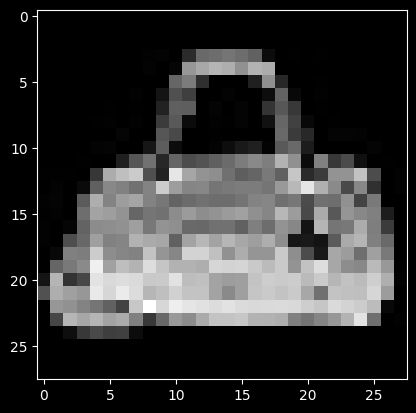

8


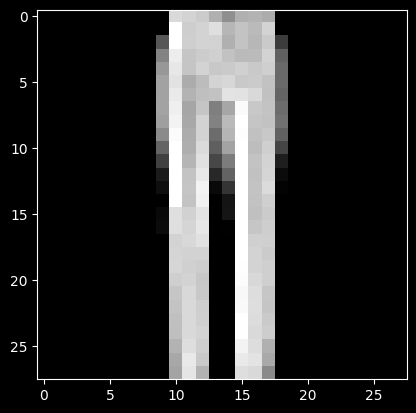

1


In [9]:
keys = np.array(range(X.shape[0])) #number of indices in samples
np.random.shuffle(keys) #shuffle indices

#grab by indice and assign to array
X = X[keys]
y = y[keys]

#test shuffling
plt.imshow(X[8].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[8])

plt.imshow(X[999].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[999])

In [11]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 32)) #dense layer 1 with 32 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(32,32)) #dense layer 2 with 32 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(32,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=1e-3),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=5, batch_size=128, print_every=100)

model.save('fashion_mnist_2.model')

model.save_train_dict('train_dict.pkl')

epoch: 1
step: 0, acc: 0.141, loss: 2.321 (data_loss: 2.321, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.719, loss: 0.629 (data_loss: 0.629, reg_loss: 0.000000), lr: 0.0009090909090909091
step: 200, acc: 0.797, loss: 0.570 (data_loss: 0.570, reg_loss: 0.000000), lr: 0.0008333333333333334
step: 300, acc: 0.836, loss: 0.472 (data_loss: 0.472, reg_loss: 0.000000), lr: 0.0007692307692307692
step: 400, acc: 0.805, loss: 0.533 (data_loss: 0.533, reg_loss: 0.000000), lr: 0.0007142857142857143
step: 468, acc: 0.802, loss: 0.518 (data_loss: 0.518, reg_loss: 0.000000), lr: 0.000681198910081744
epoch: 2
step: 0, acc: 0.812, loss: 0.494 (data_loss: 0.494, reg_loss: 0.000000), lr: 0.0006807351940095304
step: 100, acc: 0.844, loss: 0.454 (data_loss: 0.454, reg_loss: 0.000000), lr: 0.0006373486297004461
step: 200, acc: 0.836, loss: 0.429 (data_loss: 0.429, reg_loss: 0.000000), lr: 0.0005991611743559018
step: 300, acc: 0.852, loss: 0.401 (data_loss: 0.401, reg_loss: 0.000000), lr: 0.0005652911249

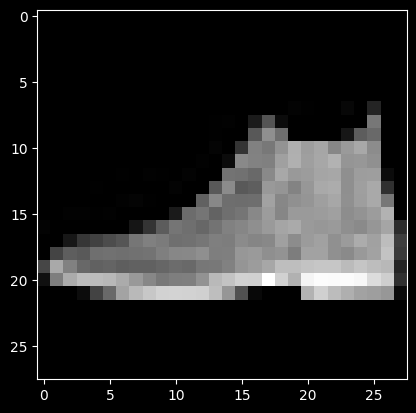

In [13]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [14]:
print(model.predict(X_test[0]))

[[6.18640695e-06 2.73413929e-05 2.39709513e-06 8.39532305e-07
  1.31996934e-05 5.70825668e-02 6.34951730e-06 1.41483864e-01
  2.12272021e-03 7.99254536e-01]]


In [17]:
print(np.argmax(model.predict(X_test[0])))
print(y_test[0])

9
9


In [18]:
for layer in model.layers:
    print(layer.output)

[[ 6.15875271  5.77980266 -5.39537482  9.16068722  9.6156052   7.65536705
  -5.70918488  4.2908187   9.84482578  8.67702765  8.97241165 10.64015961
   1.19326066  6.13429132 -2.80762708  5.77679467  0.76183625  0.23287973
   7.47208449 -5.95556392  4.75176369  1.17790164 -1.49255051  3.17263417
   8.37587957 12.33679092  0.92400456  4.76859654  8.49541475  8.89462336
   0.13898645  1.5803669 ]]
[[ 6.15875271  5.77980266  0.          9.16068722  9.6156052   7.65536705
   0.          4.2908187   9.84482578  8.67702765  8.97241165 10.64015961
   1.19326066  6.13429132  0.          5.77679467  0.76183625  0.23287973
   7.47208449  0.          4.75176369  1.17790164  0.          3.17263417
   8.37587957 12.33679092  0.92400456  4.76859654  8.49541475  8.89462336
   0.13898645  1.5803669 ]]
[[ 1.86441711 -0.42185391  5.96778243  2.514482    0.97657889  9.31522925
   0.76597318 -1.23367915 -4.56084101 -4.38468825 -3.80660218 -6.8135709
   1.27276366  0.83787393  0.63881338 -2.53181354  0.2158

In [26]:
def visualize_layers(sample_num, fig):
    input_data = X_test[sample_num]
    output_truth = y_test[sample_num]
    prediction = model.predict(input_data)
    
    pred_class = np.argmax(prediction)
    
    if pred_class == output_truth:
        title_text = f"Correct! Prediction {pred_class}, Truth {output_truth}"
        fig.suptitle(title_text, fontsize=20, color="g")
    else:
        title_text = f"Wrong! Prediction {pred_class}, Truth {output_truth}"
        fig.suptitle(title_text, fontsize=20, color="r")
        
    #Generate Axes#
    #axis for sample
    ax0 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan=1)
    #axes for the layers
    #TODO: loop layers for count and generate axes
    ax1 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan=1)
    ax3 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan=1)
    ax4 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan=1)
    ax5 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan=1)
    ax6 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan=1)
    
    
    #Gather axis data from layer outputs#
    #output is a vector
    #rotate to display vertically
    #rotates counterclockwise
    #TODO: check layer dimensions
    layer_1 = np.rot90(model.layers[0].output, k=3, axes=(0,1))
    layer_1_activated = np.rot90(model.layers[1].output, k=3, axes=(0,1))
    
    layer_2 = np.rot90(model.layers[2].output, k=3, axes=(0,1))
    layer_2_activated = np.rot90(model.layers[3].output, k=3, axes=(0,1))
    
    layer_3 = np.rot90(model.layers[4].output, k=3, axes=(0,1))
    layer_3_activated = np.rot90(model.layers[5].output, k=3, axes=(0,1))
    
    
    #Display data#
    #display sample
    ax0.imshow(input_data.reshape(28,28), cmap='gray')
    #display layer outputs
    #TODO: check layer max, min
    ax1.imshow(layer_1, cmap='RdYlGn')
    ax2.imshow(layer_1_activated, cmap='YlGn')
    
    ax3.imshow(layer_2, cmap='RdYlGn')
    ax4.imshow(layer_2_activated, cmap='YlGn')
    
    ax5.imshow(layer_3, cmap='RdYlGn')
    ax6.imshow(layer_3_activated, cmap='YlGn')
    
    ax0.axis("off")
    
    #set titles
    #TODO: do in a loop
    ax1.set_title("L1")
    ax2.set_title("L1_activated")
    ax3.set_title("L2")
    ax4.set_title("L2_activated")
    ax5.set_title("L3")
    ax6.set_title("L3_activated")
    
    plt.show()
    

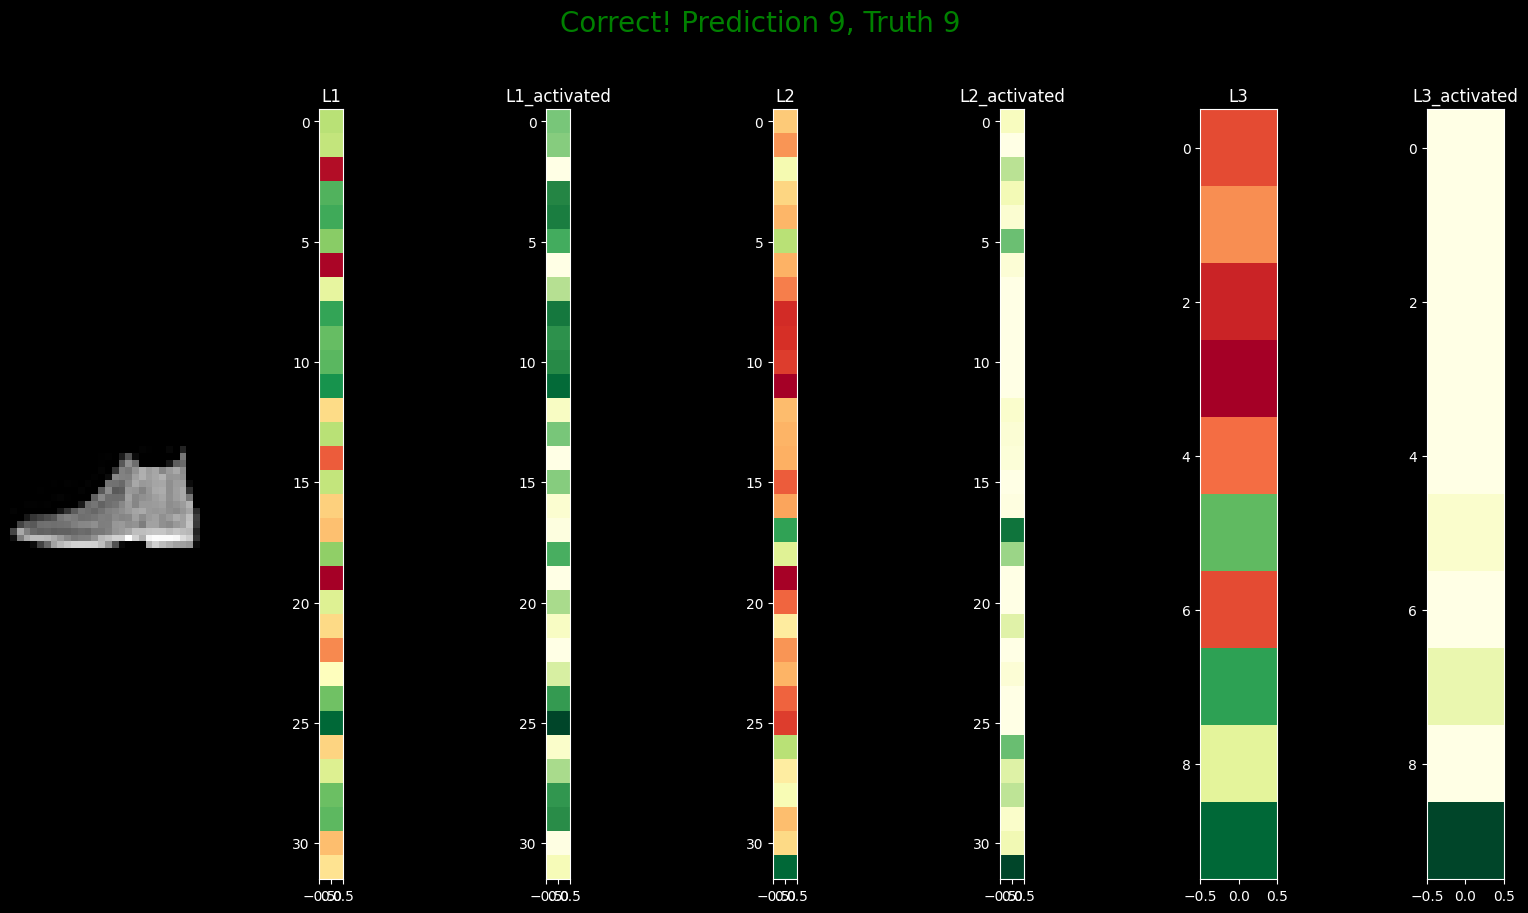

In [27]:
fig = plt.figure(figsize=(20,10))
visualize_layers(0, fig)

# Save Sample figure animations
These animations are for each sample and display the outputs from each layer

In [30]:
%matplotlib tk
from matplotlib import animation

LIMIT = 1000

dir_name = "layer_outs"

if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
fig = plt.figure(figsize=(12,12))

def animate(i):
    fig.clear()
    visualize_layers(i, fig)
    plt.savefig(f'{dir_name}/{y_test[i]}-{i}.png')

anim = animation.FuncAnimation(fig, animate, frames=LIMIT)
plt.show()

# Calculate layer output averages for each sample by class

In [31]:
from tqdm import tqdm

#get every layer from every class prediction
#example: class 0 was predicted using 6 layers
## we want to get every layers output that was used 
## in the prediction of class 0 samples
## so if we had 8 class 0 samples and each were predicted
## using 6 layers then each key (0 - 5) within the
## class 0 key would have 8 indices
## one for each sample predicted
#TODO: build dictionary based on class numbers & layers in model
layer_data_by_class = {
    0: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    1: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    2: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    3: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    4: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    5: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    6: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    7: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    8: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    9: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
}

#loop the X_test set by index
for data_n in tqdm(range(len(X_test))):
    model.predict(X_test[data_n]) #run predict on sample
    truth = y_test[data_n] #find truth for sample
    
    #add layer outputs to class label key
    #TODO: loop through layers within model to append data
    layer_data_by_class[truth][0].append(model.layers[0].output)
    layer_data_by_class[truth][1].append(model.layers[1].output)
    layer_data_by_class[truth][2].append(model.layers[2].output)
    layer_data_by_class[truth][3].append(model.layers[3].output)
    layer_data_by_class[truth][4].append(model.layers[4].output)
    layer_data_by_class[truth][5].append(model.layers[5].output)
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4834.37it/s]


In [36]:
#TODO: develop better way to average
layer_data_by_class_averages = {
    0: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    1: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    2: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    3: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    4: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    5: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    6: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    7: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    8: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []},
    9: {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
}

for class_n in layer_data_by_class_averages:
    for layer_n in layer_data_by_class_averages[class_n]:
        layer_data_by_class_averages[class_n][layer_n] = np.mean(layer_data_by_class[class_n][layer_n], axis=0)

        


# Plot class sample layer outputs/predictions averages

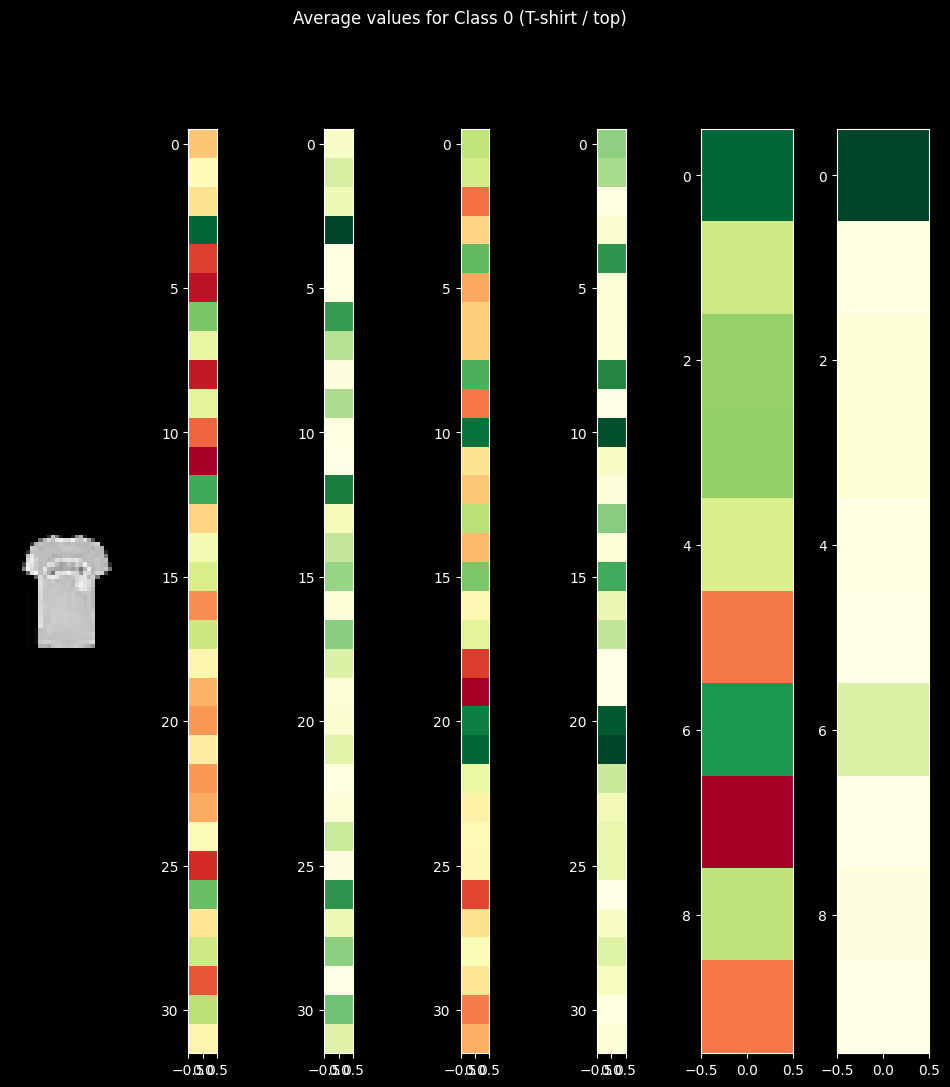

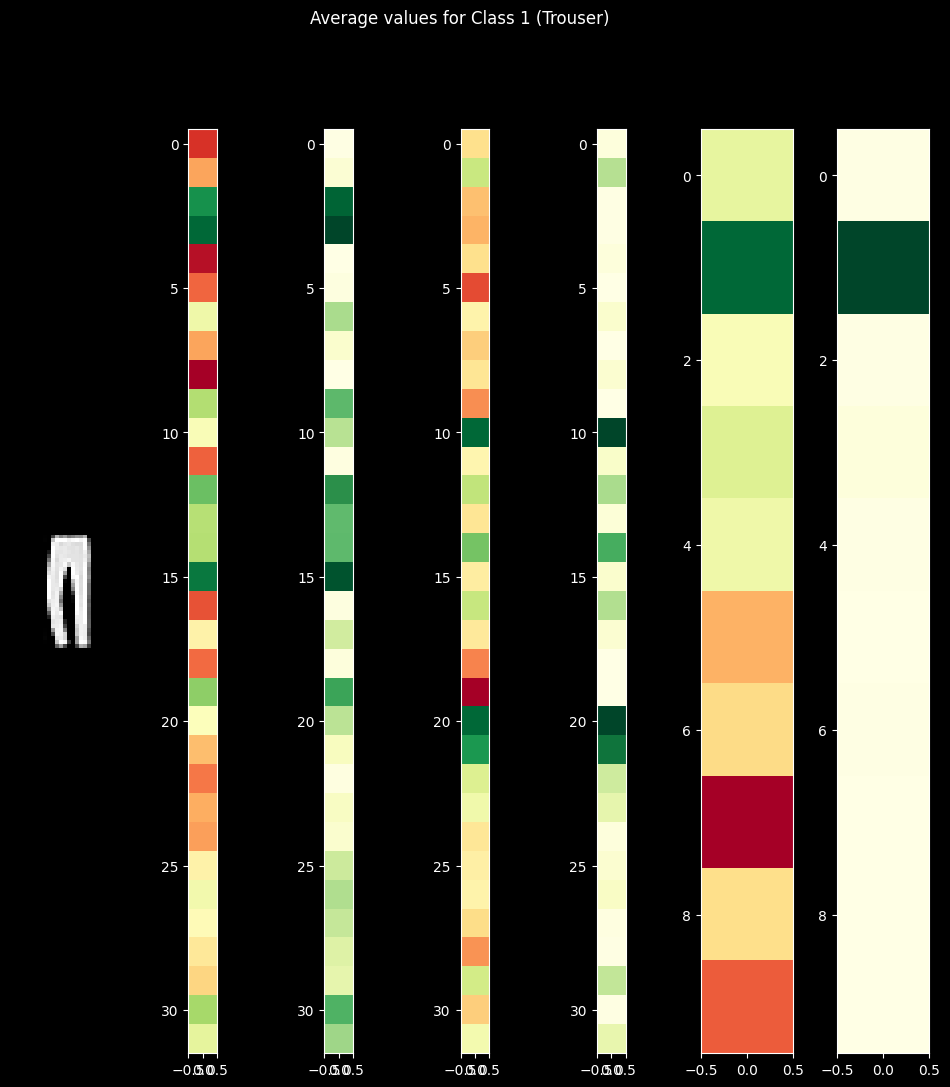

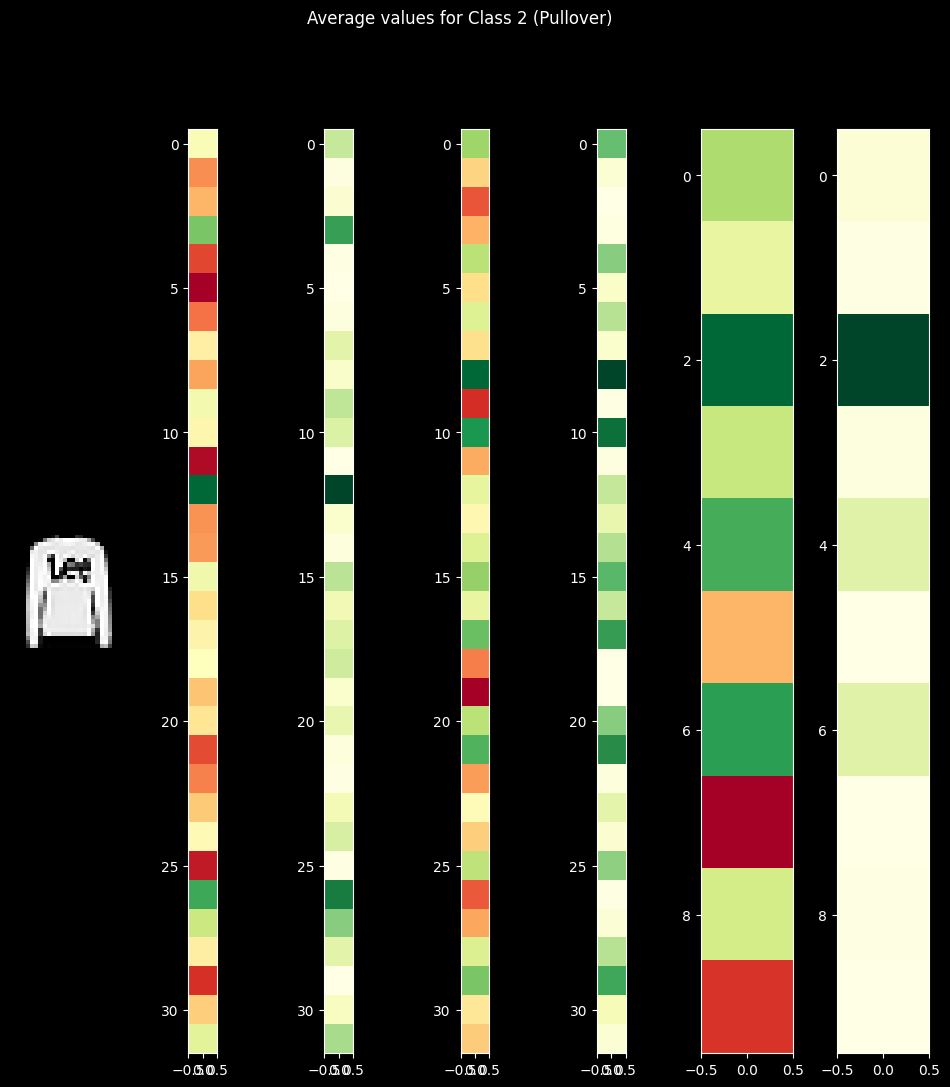

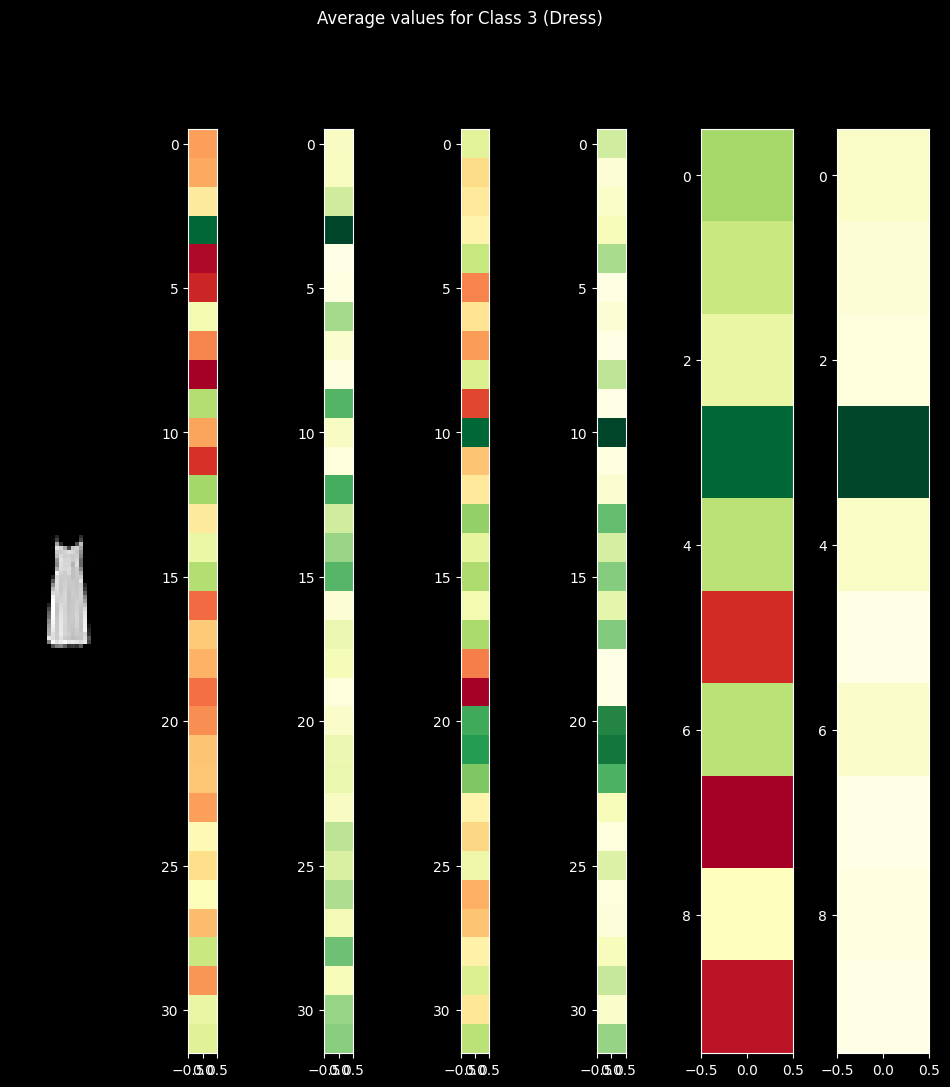

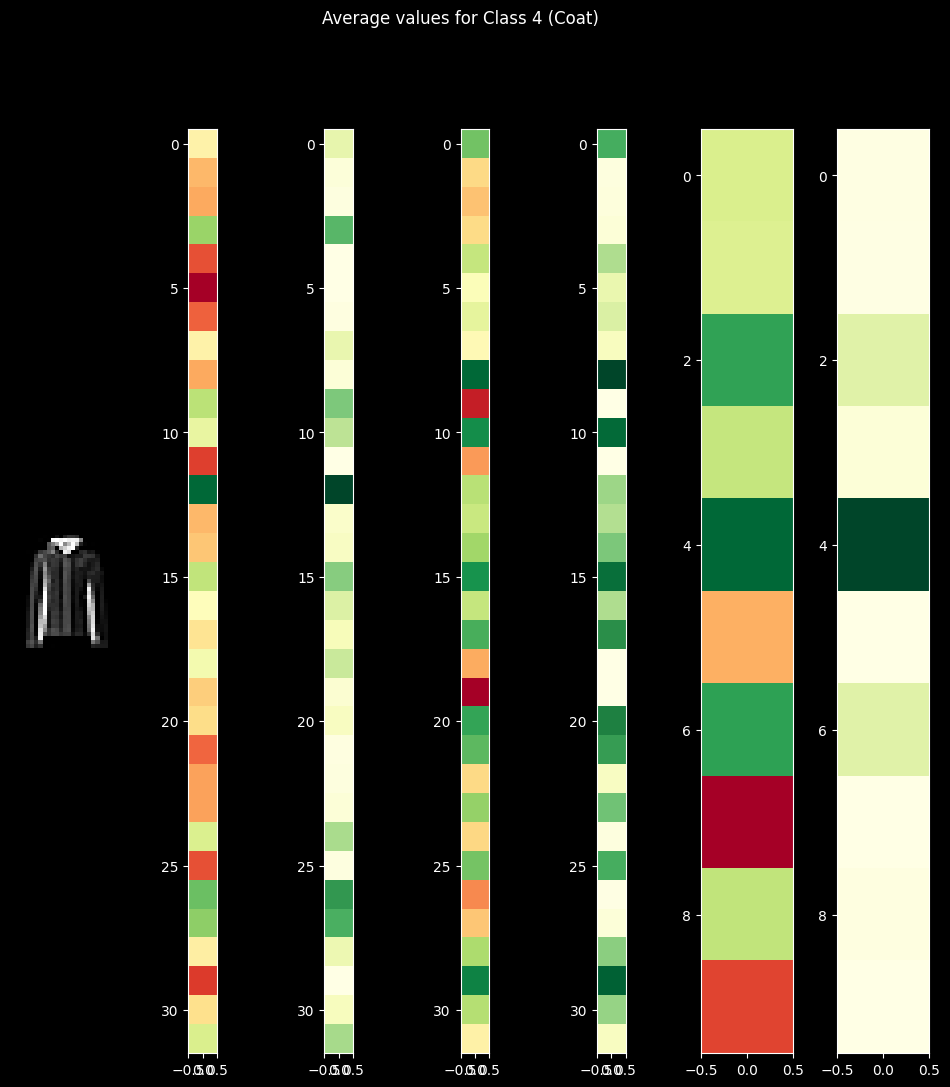

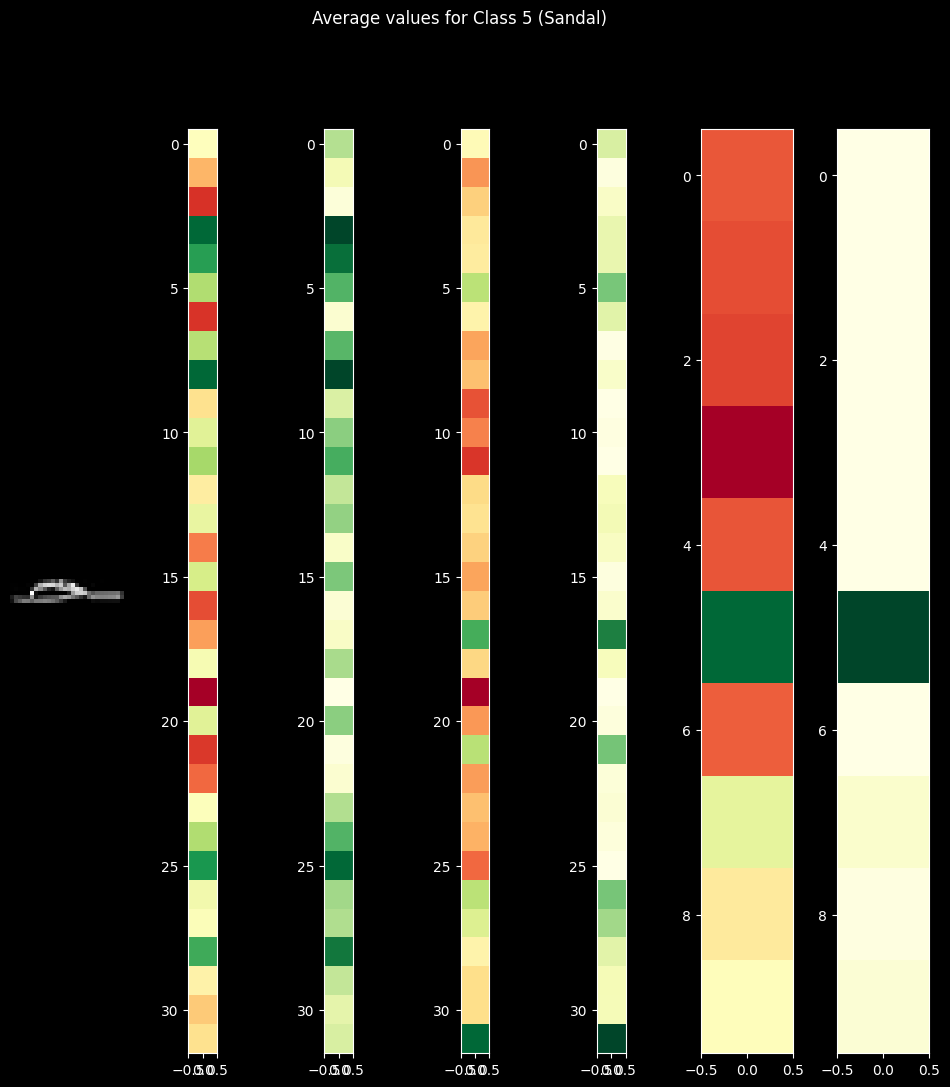

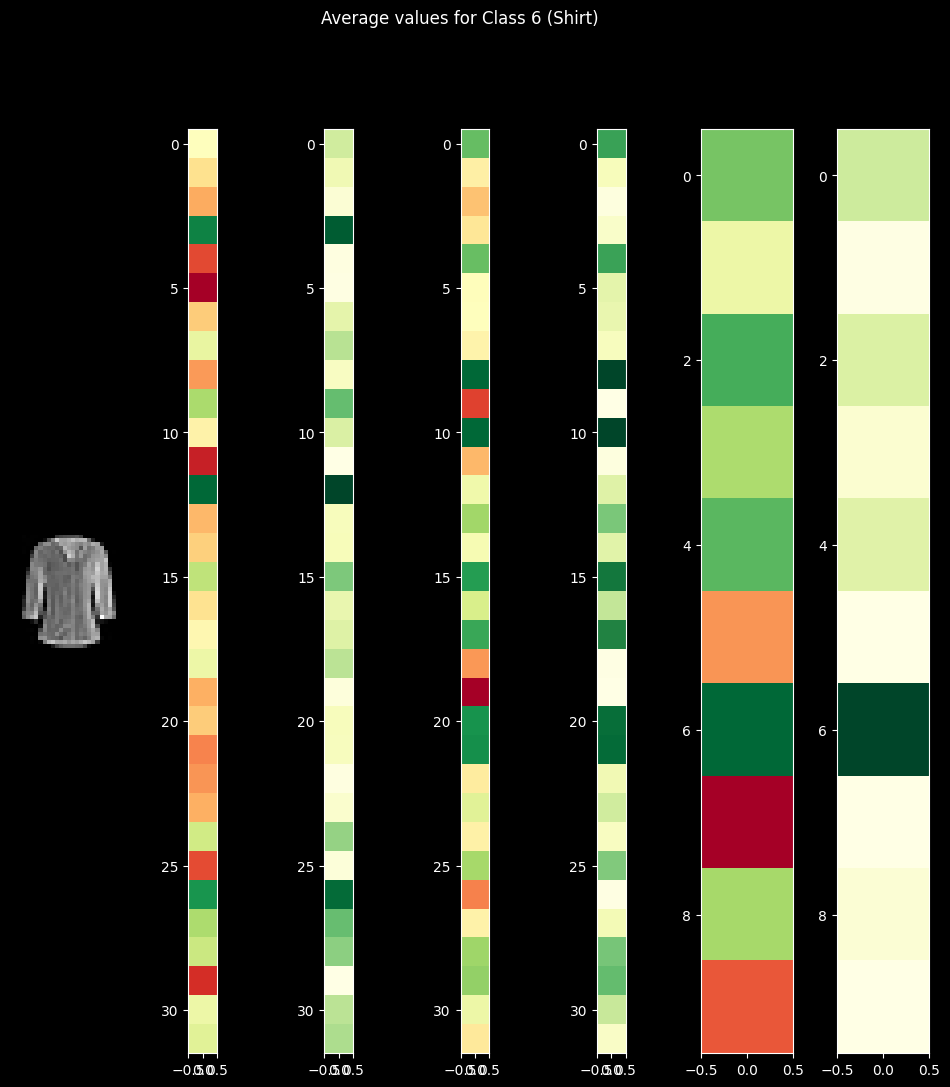

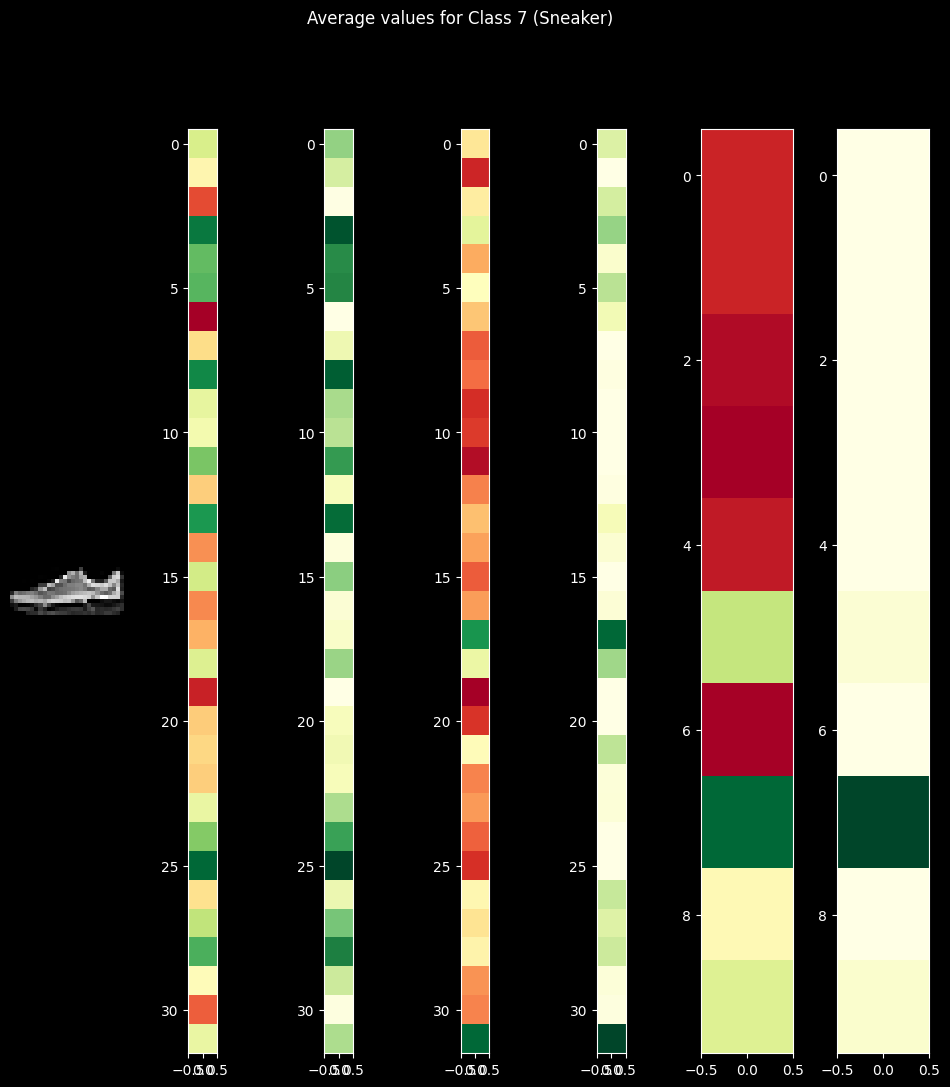

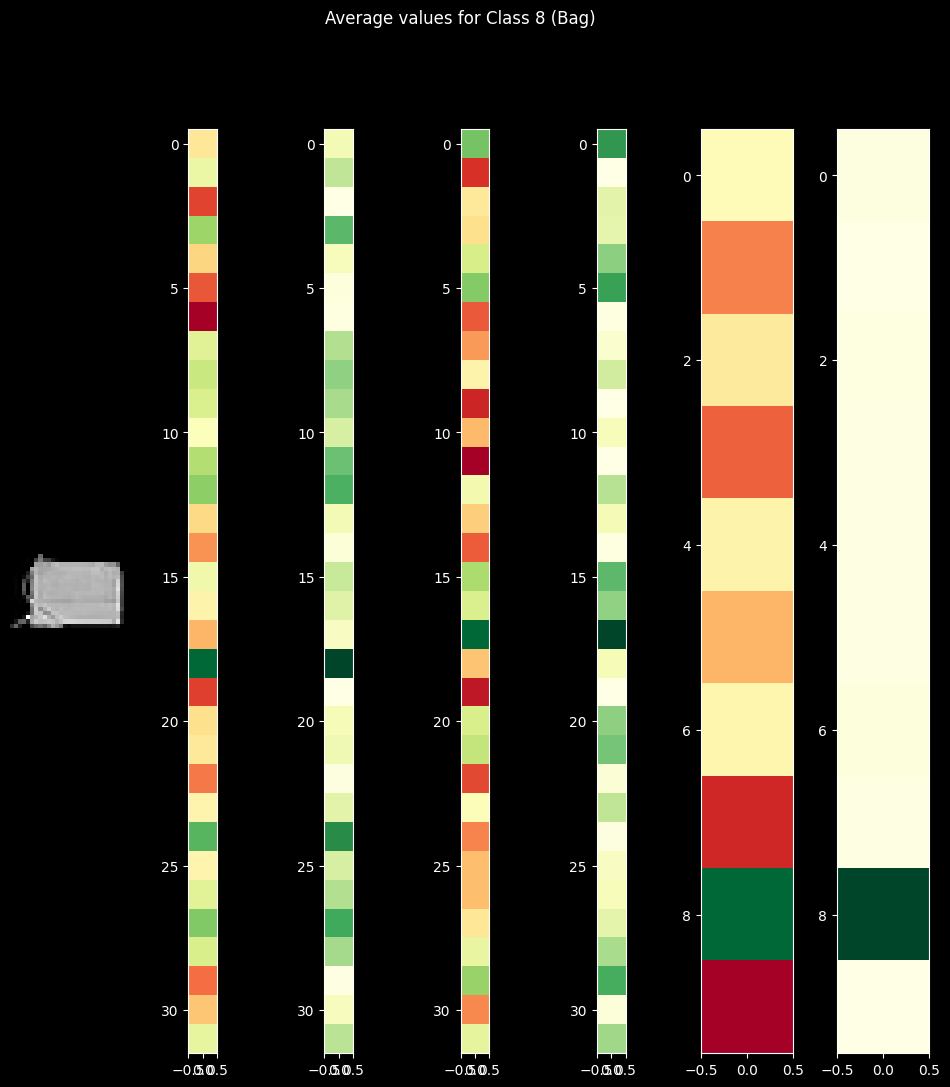

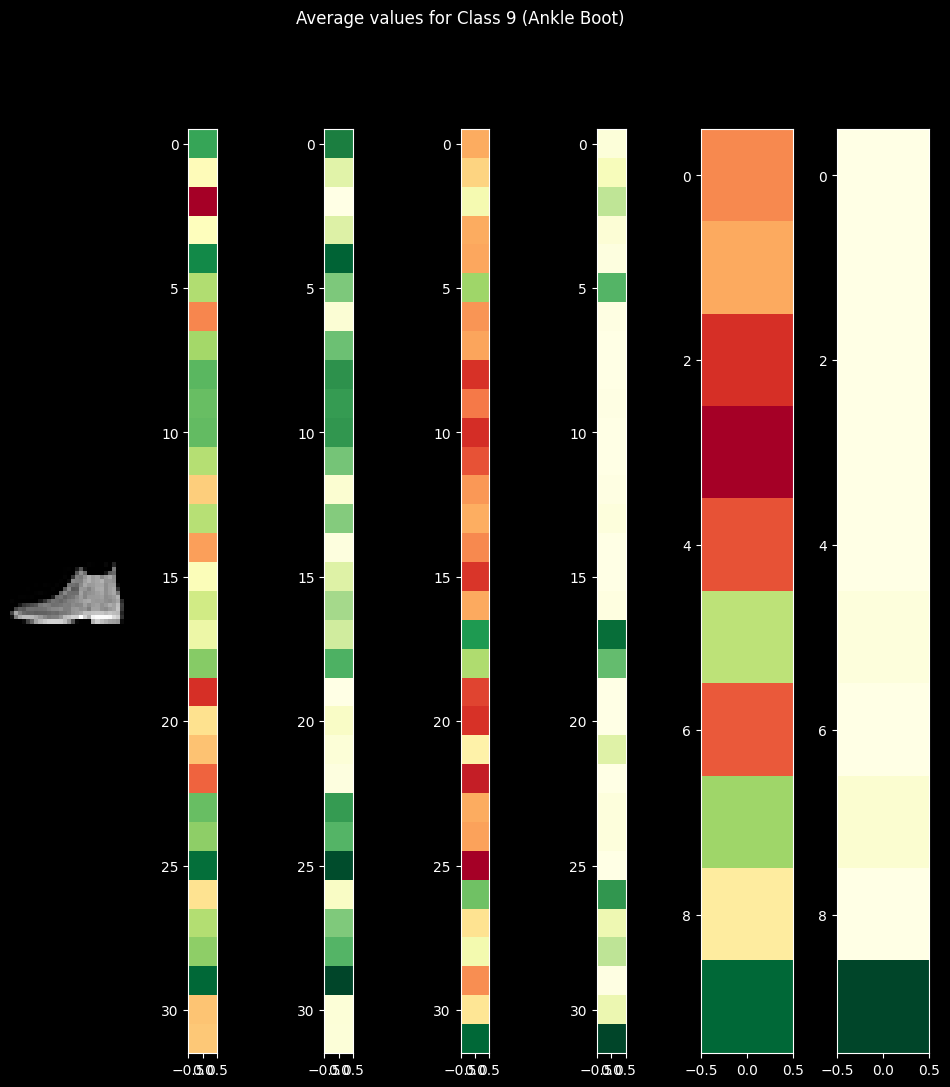

In [42]:
%matplotlib inline

### Plot Averages ####

dname = "class_avgs"

if not os.path.exists(dname):
    os.makedirs(dname)

#holds sample data representation per class (used for images)
#this is used to show an example class image in the figure
#TODO: select sample representation programmatically rather than explicitly
class_sample_dict = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

#select a sample representation for each class
#TODO: do this programmatically
class_sample_dict_idx = {} #holds found cample class representation
#loop all classes and find 1 sample per class for representation
for i, value in enumerate(y_test):
    if value not in class_sample_dict_idx:
        #load unique sample class representative 
        #in dictionary
        class_sample_dict_idx[value] = i
        #at the class key assign sample data
        #from the found index
        class_sample_dict[value] = X_test[i]
        
#class_sample_dict[0] = X_test[3328]
#class_sample_dict[1] = X_test[5215]
#class_sample_dict[2] = X_test[501]
#class_sample_dict[3] = X_test[9537]
#class_sample_dict[4] = X_test[8533]
#class_sample_dict[5] = X_test[7519]
#class_sample_dict[6] = X_test[4213]
#class_sample_dict[7] = X_test[1508]
#class_sample_dict[8] = X_test[6217]
#class_sample_dict[9] = X_test[2323]

    
for class_n in class_sample_dict:
    fig = plt.figure(figsize=(12,12))
    fig.suptitle(f'Average values for Class {class_n} ({fashion_mnist_labels[class_n]})')
    
    #Generate Axes#
    #axis for sample
    ax0 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan=1)
    #axes for the layers
    #TODO: loop layers for count and generate axes
    ax1 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan=1)
    ax3 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan=1)
    ax4 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan=1)
    ax5 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan=1)
    ax6 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan=1)
    
    
    #Gather axis data from layer output averages by sample class#
    #output is a vector
    #rotate to display vertically
    #rotates counterclockwise
    #TODO: do this in a loop based on the layers and classes
    layer_1 = np.rot90(layer_data_by_class_averages[class_n][0], k=3, axes=(0,1))
    layer_1_activated = np.rot90(layer_data_by_class_averages[class_n][1], k=3, axes=(0,1))
    
    layer_2 = np.rot90(layer_data_by_class_averages[class_n][2], k=3, axes=(0,1))
    layer_2_activated = np.rot90(layer_data_by_class_averages[class_n][3], k=3, axes=(0,1))
    
    layer_3 = np.rot90(layer_data_by_class_averages[class_n][4], k=3, axes=(0,1))
    layer_3_activated = np.rot90(layer_data_by_class_averages[class_n][5], k=3, axes=(0,1))
    
    
    #Display data#
    #display sample
    ax0.imshow(class_sample_dict[class_n].reshape(28,28), cmap='gray')
    #display layer outputs
    #TODO: loop axes and configure them
    ax1.imshow(layer_1, cmap='RdYlGn')
    ax2.imshow(layer_1_activated, cmap='YlGn')
    
    ax3.imshow(layer_2, cmap='RdYlGn')
    ax4.imshow(layer_2_activated, cmap='YlGn')
    
    ax5.imshow(layer_3, cmap='RdYlGn')
    ax6.imshow(layer_3_activated, cmap='YlGn')
    
    ax0.axis("off")
    
    #save figure images in directory by class name
    plt.savefig(f"{dname}/{class_n}.png")
    


# Plot all training data for each dense layer

In [48]:
%matplotlib tk

def make_plots():
    #TODO: add parameter to give training data file
    with open("train_dict.pkl", 'rb') as f:
        train_dict = pickle.load(f)
        
    #TODO: create axes programatically from train_dict
    #this is hardcoded from model (3 dense layers)
    fig = plt.figure(figsize=(15,5))
    ax0 = fig.add_subplot(131)
    ax1 = fig.add_subplot(132)
    ax2 = fig.add_subplot(133)
    
    #TODO: assign this variable based on root keys in
    ## train_dict. The root keys are the epochs, the sum
    ## is the number of epochs
    epochs = 5 #this is hardcoded from are recently ran model
    
    for epoch in range(1,epochs+1):
        print("Epoch", epoch)
        for step in train_dict[epoch]:
            #print every 10 steps
            if (step % 10) == 0:
                print("Step", step)
                
                ### Display Layer weights ###
                #TODO: generate graph programmatically
                weights_0 = train_dict[epoch][step][0]["weights"]
                weights_1 = train_dict[epoch][step][1]["weights"]
                weights_2 = train_dict[epoch][step][2]["weights"]
                
                ax0.imshow(weights_0, cmap='RdYlGn')
                ax1.imshow(weights_1, cmap='RdYlGn')
                ax2.imshow(weights_2, cmap='RdYlGn')
                
                fig.suptitle(f"Fashion MNIST Dense NN Epoch: {epoch} Step: {step}", fontsize=20)
                
                ax0.set_title("Layer 1 weights\nin 784, out 32")
                ax1.set_title("Layer 2 weights\nin 32, out 32")
                ax2.set_title("Layer 3 weights\nin 32, out 10")
                
                ax0.title.set_fontsize(10)
                ax1.title.set_fontsize(10)
                ax2.title.set_fontsize(10)
                
                ax0.set_aspect(0.05)
                
                ax0.set_ylim(0,784)
                
                fig.set_size_inches(8,8)
                
                plt.pause(0.01)
                ax0.clear()
                ax1.clear()
                ax2.clear()
                
    plt.show()

In [49]:
import pickle
make_plots()

Epoch 1
Step 0
Step 10
Step 20
Step 30
Step 40
Step 50
Step 60
Step 70
Step 80
Step 90
Step 100
Step 110
Step 120
Step 130
Step 140
Step 150
Step 160
Step 170
Step 180
Step 190
Step 200
Step 210
Step 220
Step 230
Step 240
Step 250
Step 260
Step 270
Step 280
Step 290
Step 300
Step 310
Step 320
Step 330
Step 340
Step 350
Step 360
Step 370
Step 380
Step 390
Step 400
Step 410
Step 420
Step 430
Step 440
Step 450
Step 460
Epoch 2
Step 0
Step 10
Step 20
Step 30
Step 40
Step 50
Step 60
Step 70
Step 80
Step 90
Step 100
Step 110
Step 120
Step 130
Step 140
Step 150
Step 160
Step 170
Step 180
Step 190
Step 200
Step 210
Step 220
Step 230
Step 240
Step 250
Step 260
Step 270
Step 280
Step 290
Step 300
Step 310
Step 320
Step 330
Step 340
Step 350
Step 360
Step 370
Step 380
Step 390
Step 400
Step 410
Step 420
Step 430
Step 440
Step 450
Step 460
Epoch 3
Step 0
Step 10
Step 20
Step 30
Step 40
Step 50
Step 60
Step 70
Step 80
Step 90
Step 100
Step 110
Step 120
Step 130
Step 140
Step 150
Step 160
Step 170
S